In [1]:
import numpy as np
import scipy
from scipy.linalg import solve_triangular
import matplotlib.pyplot as plt
import pdb
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
np.random.seed(12)

## (a)

In [2]:
def normalize(x):
    
    return x / norm(x)

def norm(x):
    
    return np.sqrt((x**2).sum())

def GS_QR(X):
    A = X.copy()
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    
    Q[:, 0] = normalize(A[:, 0])
    R[0,0] = norm(A[:, 0])
    for i in range(1, n):
        R[0, i] = (Q[:, 0] * A[:, i]).sum()
        A[:, i] -= R[0, i] * Q[:, 0] 
    
    for j in range(1, n):
        Q[:, j] = normalize(A[:, j])
        R[j,j] = norm(A[:, j])
        for i in range(j + 1, n):
            R[j, i] = (Q[:, j] * A[:, i]).sum()
            A[:, i] -= R[j, i] * Q[:, j] 
        
    return Q, R



## (b) & (c)

Note for Householder my **House_QR** implicitly stored Q, R together; **house_qr** function stores Q, R separately. 

In [3]:
def house(x):
    a = - np.sign(x[0]) * norm(x)
    v0 = np.sqrt(0.5 * (1 - x[0] / a))
    v = - x / (2 * a * v0)
    v[0] = v0
    
    return v, a

def reflection(x, v):
    
    return x - 2 * np.sum(x * v) * v

def Reflection_matrix(X,v):## todo: speed up
    HX = np.zeros(shape = X.shape)
    for i in range(X.shape[1]):
        HX[:, i] = reflection(X[:, i], v)
        
    return HX

    

def House_QR(X):
    A = X.copy()
    n = A.shape[1]
    for i in range(n):
        v, a = house(A[i:,i])
        A[i, i] = a
        A[(i+1):, i] = v[1:]
        A[i:, (i+1):] = Reflection_matrix(A[i:, (i+1):], v)
    
    return A

def oper_Q(x, qr):
    y = x.copy()
    m, n = qr.shape
    for i in reversed(range(n - 1)):
        last = m - i
        v = np.zeros(last)
        #pdb.set_trace()
        v[1:] = qr[-(last-1):,i]
        v[0] = np.sqrt(1 - (v[1:]**2).sum())
        y[-last:] = reflection(y[-last:], v)
        
    return y

def oper_Qt(x, qr):
    y = x.copy()
    m, n = qr.shape
    for i in range(n):
        last = m - i
        v = np.zeros(last)
        v[1:] = qr[-(last-1):,i]
        v[0] = np.sqrt(1 - (v[1:]**2).sum())
        y[-last:] = reflection(y[-last:], v)
        
    return y

def get_Q(qr):
    m = qr.shape[0]
    tmp = np.identity(m)
    Q = np.zeros((m, m))
    #pdb.set_trace()
    for i in range(m):
        x = tmp[:, i]
        Q[:, i] = oper_Q(x, qr)
    
    return Q


def house_qr(X):
    qr = House_QR(X)
    q = get_Q(qr)
    r = np.triu(qr)
    
    return q, r
    
    
def scale_qr(Q, R):
    ## when Q, R are both n by n
    n = Q.shape[0]
    D = np.diag(np.sign(np.diag(R)))
    R = D @ R
    Q = Q @ D ## todo: more efficient
    
    return Q, R
    
# np.random.seed(123)
# m = 12
# A = np.random.normal(size = (m, m))
# q0, r0 = np.linalg.qr(A)
# q1, r1 = house_qr(A)
# q2, r2 = GS_QR(A)

# q0, r0 = scale_qr(q0, r0)
# q1, r1 = scale_qr(q1, r1)
# q2, r2 = scale_qr(q2, r2)



# q0[:, 9]
# q1[:, 9]
# q2[:, 9]

# r0[m-1,:]
# r1[m - 1,:]
# r2[m-1,:]

# np.diag(r0)
# np.diag(r1)
# np.diag(r2)


# def generate_instance0(n):
#     np.random.seed(123)
#     B = np.random.normal(size = (n, n))
#     R = np.random.normal(size = (n, n))
#     R = np.triu(R)
#     Q, _ = np.linalg.qr(B, mode = 'complete')
    
#     return Q, R

# Q, R = generate_instance0(10)
# A = Q @ R
# qr = House_QR(A)
# q1, r1 = house_qr(A)

## (d)

In [4]:
def exper1(qr_func, Q, R):
    n = R.shape[1]
    A = Q @ R
    q, r = qr_func(A)
    q, r = scale_qr(q, r)
    
    err0 = norm(R - r) / norm(R)
    err1 = norm(Q - q) / norm(q)
    err2 = norm(A - q @ r) / norm(A)
    err3 = norm(np.identity(n) - q.T @ q) / np.sqrt(n)
    
    return err0, err1, err2, err3


def generate_instance0(n):
    np.random.seed(123)
    B = np.random.normal(size = (n, n))
    R = np.random.normal(size = (n, n))
    R = np.triu(R)
    Q, _ = np.linalg.qr(B, mode = 'complete')
    Q, R = scale_qr(Q, R)
    
    return Q, R

ns = [100, 150, 200,250,  300, 350, 400]
err_gs = np.zeros(shape = (4, len(ns)))
err_h = np.zeros(shape = (4, len(ns)))

for i in range(len(ns)):
    Q, R = generate_instance0(ns[i])
    err_gs[:, i] = exper1(GS_QR, Q, R)
    err_h[:, i] = exper1(house_qr, Q, R)

error: R, Q, QR, QtQ
['black', 'red', 'blue', 'yellow']


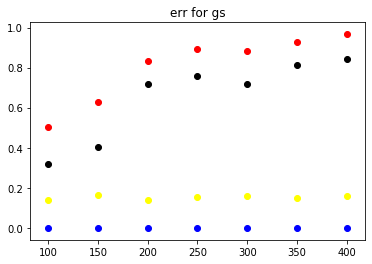

In [5]:
cols = ["black", "red", "blue", "yellow"]
print("error: R, Q, QR, QtQ")
print(cols)

fig = plt.figure()
ax = plt.gca()
ax.scatter(ns, err_gs[0,:], color = cols[0])
ax.title.set_text("err for gs")
for i in range(1, 4):
    ax.scatter(ns, err_gs[i,:], color = cols[i])

# ax.set_yscale('log')
# ax.set_xscale('log')

plt.show()



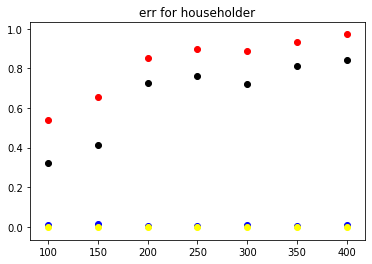

In [6]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(ns, err_h[0,:], color = cols[0])
ax.title.set_text("err for householder")
for i in range(1, 4):
    ax.scatter(ns, err_h[i,:], color = cols[i])

# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()


### (i)

Relative error in $\hat{Q}$ and $\hat{R}$ are much bigger than error in $\hat{Q} \hat{R}$ and in $\hat{Q}^T \hat{Q}$. Indeed we see in class forward error are amplified by condition number. 

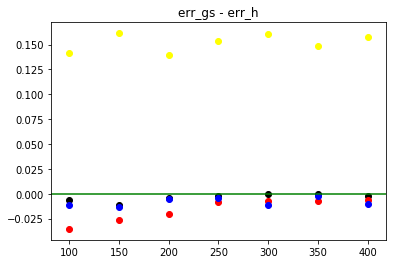

In [10]:
fig = plt.figure()
ax = plt.gca()
err_diff = err_gs - err_h
ax.scatter(ns, err_diff[0,:], color = cols[0])
ax.title.set_text("err_gs - err_h")
for i in range(1, 4):
    ax.scatter(ns, err_diff[i,:], color = cols[i])

plt.axhline(y=0, color='green', linestyle='-')
plt.show()

# fig = plt.figure()
# ax = plt.gca()
# err_diff = err_gs - err_h
# ax.scatter(ns, err_diff[3,:], color = cols[3])
# ax.title.set_text("err_gs - err_h")
# plt.show()



### (ii)

Householder has much smaller relative error in $\hat{Q}^T \hat{Q}$ where in terms of $\hat{Q} \hat{R}$ error they are close. 

### Testing

In [8]:
A = np.random.normal(size = (7, 5))
q0, r0 = np.linalg.qr(A, mode = 'complete')
q1, r1 = GS_QR(A)
qr = House_QR(A)

print(r0)
print(np.triu(qr))

x = np.random.normal(size = (7))
qx0 = q0 @ x
qx2 = oper_Q(x, qr)

print(qx0)
print(qx2)

x = np.random.normal(size = (7))
qx0 = q0.T @ x
qx2 = oper_Qt(x, qr)

print(qx0)
print(qx2)

[[ 2.7958329  -2.32197739 -0.08342916 -0.72604006  0.95004707]
 [ 0.          2.38738651  1.15524944 -1.13883586 -1.03216589]
 [ 0.          0.         -1.99767713 -0.5261451   0.8241714 ]
 [ 0.          0.          0.          2.46869068 -2.04445323]
 [ 0.          0.          0.          0.         -1.84524191]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
[[ 2.7958329  -2.32197739 -0.08342916 -0.72604006  0.95004707]
 [ 0.          2.38738651  1.15524944 -1.13883586 -1.03216589]
 [ 0.          0.         -1.99767713 -0.5261451   0.8241714 ]
 [ 0.          0.          0.          2.46869068 -2.04445323]
 [ 0.          0.          0.          0.         -1.84524191]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
[-2.38521133 -1.23076662  0.56444861  0.67984756  0.12264658 -0.15487105
 -1.25626875]
[-1.63728201 -1.99793288  0.8

## (d)

## (e) 

In [11]:
def generate_instance(m, n):
    a = np.array([i / (m - 1) for i in range(m)])
    A = np.vander(a, N=n, increasing=True)
    b = np.exp(np.sin(4 * a))
    
    return A, b

def solve1(A, b):
    m, n = A.shape
    qr = House_QR(A)
    c1 = oper_Qt(b, qr)[:n]
    x = solve_triangular(np.triu(qr)[:n,:], c1)
    
    return x

           
def solve2(A, b):
    m, n = A.shape
    qr = House_QR(np.append(A, b[:, None], 1))
    R = np.triu(qr)[:n,:n]
    r = np.triu(qr)[:n,n]
    x = solve_triangular(R, r)
    
    return x

def solve3(A, b):
    AtA = A.T @ A
    Atb = A.T @ b
    x = np.linalg.solve(AtA, Atb)
    
    return x



n = 15
m = 100
A, b = generate_instance(m, n)

print("solution for c14 in (i)")
c = solve1(A, b)
print(c[-1])

print("solution for c14 in (ii)")
c = solve2(A, b)
print(c[-1])

print("solution for c14 in (iii)")
c = solve3(A, b)
print(c[-1])

solution for c14 in (i)
2006.7868391913557
solution for c14 in (ii)
2006.7868391913557
solution for c14 in (iii)
-353.39822812031474


### Comment:
QR to both $A$ and $[A, b]$ yields very accurate solution, whereas solving normal equation gives very very bad result. 